In [148]:
import random
import numpy as np
import collections
from mitiq.rem import generate_inverse_confusion_matrix
from mitiq import rem
import matplotlib.pyplot as plt

In [135]:
original = ["10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "11111", "10101", "10101", "10101", "10110", "10101", "10101", "10101", "10101", "11110", "10101", "10101", "01111", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "01110", "01101", "10110", "11101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10110", "10101", "01101", "10101", "10101", "10101", "01101", "10101", "10101", "01010", "11111", "10101", "10101", "10101", "10101", "01110", "10101", "10101", "10101", "01101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10110", "11110", "10101", "10101", "11011", "10101", "11110", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "01010", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "01010", "10101", "10110", "10101", "10101", "10101", "10101", "10101", "10101", "10110", "10101", "10101", "10101", "10101", "10101", "01010", "10101", "10101", "10101", "10101", "10101", "01110", "10101", "10101", "10110", "01110", "10101", "10101", "10101", "10101", "10101", "10110", "10101", "10101", "10101", "10101", "01101", "10101", "01010", "10101", "01010", "10101", "10101", "10101", "11110", "10101", "10101", "01101", "01010", "10110", "10101", "10101", "10101", "10101", "10101", "01101", "11011", "11010", "01110", "10101", "01110", "11010", "10101", "01101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "01110", "10101", "10101", "10101", "10101", "10101", "10110", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "01011", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "11011", "10101", "10110", "01110", "10101", "10101", "10110", "11110", "10101", "01101", "01101", "01111", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "11111", "01101", "10101", "11111", "10101", "10101", "10101", "10101", "01101", "10101", "10101", "11110", "10101", "10101", "10101", "10101", "10101", "10101", "01101", "10101", "10110", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10110", "10101", "10101", "10101", "01101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "01111", "10101", "10101", "10101", "10101", "10101", "10101", "11111", "10101", "10101", "10101", "10110", "01101", "01010", "01101", "10101", "10101", "10101", "10101", "10101", "10110", "10101", "10101", "10101", "10101", "10101", "10101", "01101", "10101", "10101", "10110", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "11110", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "01101", "10101", "10101", "10110", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "01101", "10101", "10101", "10101", "11111", "01101", "10101", "01010", "10110", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "01101", "10101", "10101", "10101", "10101", "10101", "11011", "10101", "10101", "01101", "10101", "10101", "10101", "10101", "10110", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "11111", "10101", "10101", "01010", "10101", "10101", "10101", "10110", "10101", "10101", "10101", "11110", "10101", "10101", "10101", "10110", "10101", "01101", "10101", "10101", "01010", "10101", "10101", "01010", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10110", "01101", "10101", "10101", "10101", "10101", "10101", "10101", "11110", "10101", "11111", "10101", "10101", "10101", "10101", "10101", "01101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "11110", "10101", "10101", "10101", "10101", "10110", "01111", "11111", "10101", "11111", "10101", "10101", "10101", "01010", "10101", "10101", "10101", "10101", "10110", "10101", "10101", "10101", "10101", "10101", "11011", "10101", "01101", "10101", "10101", "10101", "11111", "10110", "10101", "10101", "01101", "10101", "10101", "01010", "10101", "10110", "10101", "10101", "01010", "10101", "10101", "01101", "10101", "10101", "10101", "10101", "10110", "10101", "10110", "10101", "10101", "01010", "10101", "10101", "01101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "01101", "10101", "10101", "10101", "10110", "10101", "10101", "10101", "10101", "01101", "10101", "10110", "11111", "10101", "10101", "10101", "10110", "10101", "01010", "10101", "10101", "10101", "11111", "01010", "10101", "01010", "10101", "10101", "10101", "10101", "10101", "10110", "01110", "01010", "10101", "10101", "10101", "10101", "10101", "01101", "10101", "10101", "01111", "10101", "10101", "10101", "10101", "01101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "01101", "10101", "01110", "11011", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10110", "10101", "10101", "01101", "10101", "10101", "10101", "10101", "10101", "10101", "01101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "01101", "10110", "10101", "10101", "10101", "11011", "01101", "10101", "10101", "10101", "10101", "10101", "10101", "01110", "10101", "10110", "10101", "10110", "10101", "10101", "10101", "01101", "10101", "10101", "10101", "10101", "01111", "10101", "10101", "10101", "11111", "10101", "10101", "10101", "10101", "10101", "10110", "10101", "10101", "10101", "10101", "10101", "10110", "10101", "01110", "10101", "10101", "10101", "10101", "10101", "11111", "10101", "10110", "10101", "10101", "10101", "11110", "01010", "10101", "10101", "10101", "10110", "10101", "10101", "01010", "10101", "11111", "11111", "10101", "11111", "10101", "10101", "10101", "10101", "10101", "10101", "10110", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10110", "10101", "10101", "10101", "10101", "10101", "10101", "10110", "10101", "10101", "10101", "10110", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "01101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10110", "10101", "10101", "01010", "10101", "10101", "10101", "10101", "10101", "11111", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10110", "10101", "01101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "01111", "10101", "10101", "10101", "10101", "10101", "01101", "10101", "10101", "10101", "10101", "10101", "10110", "01101", "10101", "10101", "10101", "10101", "10101", "10110", "10101", "11011", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "11111", "10101", "10101", "10101", "10101", "10101", "10101", "10110", "10101", "10101", "01101", "01010", "10101", "10101", "10110", "01010", "10110", "10101", "10101", "10101", "01101", "10101", "10101", "10101", "10101", "10110", "01101", "10101", "10101", "10101", "10101", "10101", "10101", "01101", "11010", "01101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "11111", "10110", "10101", "10101", "10101", "10101", "10101", "10101", "11111", "10101", "10101", "10110", "01110", "10110", "10101", "10101", "10101", "10101", "10101", "01101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10110", "10101", "10101", "10101", "10101", "10101", "01011", "01101", "10101", "10101", "01101", "01011", "10101", "10101", "01011", "10101", "11111", "11011", "10101", "10101", "10101", "11111", "10101", "10101", "01010", "10110", "10101", "01101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "01101", "10101", "10101", "01101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "01101", "01101", "01101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "01010", "01101", "10101", "01101", "10101", "10101", "11111", "11111", "10101", "10101", "01010", "10101", "10101", "10101", "10101", "10101", "01111", "10101", "10101", "10101", "10101", "10101", "10110", "11010", "10101", "10110", "11010", "10101", "10101", "10101", "10110", "11111", "10101", "10101", "10101", "10101", "10101", "10101", "01101", "10101", "10101", "10110", "01101", "10101", "11111", "10101", "10101", "10101", "10101", "10110", "10101", "01101", "10101", "10101", "10101", "10110", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101", "10101"]

In [169]:
def randomize_bits(bit_string):
    result = []
    for bit in bit_string:
        if bit == '0' and random.random() < 0.05:
            result.append('1')
        elif bit == '1' and random.random() < 0.01:
            result.append('0')
        else:
            result.append(bit)
    return ''.join(result)

In [170]:
addedError = [randomize_bits(bits) for bits in original]
originalDict = {}
addedErrorDict = {}
addedErrorDist = [0] * 32

for val in original:
  if val in originalDict:
    originalDict[val] += 1
  else:
    originalDict[val] = 1

for val in addedError:
  if val in addedErrorDict:
    addedErrorDict[val] += 1
  else:
    addedErrorDict[val] = 1
  addedErrorDist[int(val, 2)] += 1

for i in range(len(addedErrorDist)):
  addedErrorDist[i] = addedErrorDist[i] / 1000

originalDict = dict(sorted(originalDict.items(), key=lambda item: item[1], reverse=True))
addedErrorDict = dict(sorted(addedErrorDict.items(), key=lambda item: item[1], reverse=True))

print("Original Distribution: " + str(originalDict))
print("Artificial Error Distribution: " + str(addedErrorDict))

Original Distribution: {'10101': 767, '10110': 64, '01101': 62, '11111': 28, '01010': 28, '01110': 13, '11110': 11, '11011': 9, '01111': 8, '11010': 5, '01011': 4, '11101': 1}
Artificial Error Distribution: {'10101': 671, '10110': 56, '01101': 51, '11101': 40, '10111': 37, '11111': 32, '01010': 27, '11110': 14, '01111': 12, '01110': 12, '10001': 10, '11011': 8, '10100': 8, '01011': 6, '00101': 5, '11010': 4, '01100': 2, '11001': 1, '00111': 1, '10011': 1, '10010': 1, '11000': 1}


In [171]:
inverse_confusion_matrix = generate_inverse_confusion_matrix(len(original[0]), 0.05, 0.01) # Fits all bit string length
print("Array size: " + str(len(inverse_confusion_matrix)))
print(inverse_confusion_matrix)

Array size: 32
[[ 1.29579621e+00 -1.30888506e-02 -1.30888506e-02 ...  1.34895023e-08
   1.34895023e-08 -1.36257599e-10]
 [-6.54442530e-02  1.24344081e+00  6.61053060e-04 ... -1.28150272e-06
  -6.81287995e-10  1.29444719e-08]
 [-6.54442530e-02  6.61053060e-04  1.24344081e+00 ... -6.81287995e-10
  -1.28150272e-06  1.29444719e-08]
 ...
 [ 8.43093894e-06 -1.60187840e-04 -8.51609994e-08 ...  1.09872839e+00
   5.84119295e-04 -1.10982666e-02]
 [ 8.43093894e-06 -8.51609994e-08 -1.60187840e-04 ...  5.84119295e-04
   1.09872839e+00 -1.10982666e-02]
 [-4.25804997e-07  8.09029494e-06  8.09029494e-06 ... -5.54913330e-02
  -5.54913330e-02  1.05433533e+00]]


In [172]:
processed = (np.matmul(inverse_confusion_matrix, addedErrorDist))
for i in range(len(processed)):
  if processed[i] < 0:
    processed[i] = 0

processedDict = {}
for i in range(len(processed)):
  if processed[i] > 0:
      processedDict[format(i, '0' + str(len(original[0])) + 'b')] = int(processed[i] * len(original))

sorted_dict = dict(sorted(processedDict.items(), key=lambda item: item[1], reverse=True))
print("Original Distribution/" + "Artificial Error Distribution/" + "Post-REM")
print(str(originalDict))
print(str(addedErrorDict))
print(str(sorted_dict))

Original Distribution/Artificial Error Distribution/Post-REM
{'10101': 767, '10110': 64, '01101': 62, '11111': 28, '01010': 28, '01110': 13, '11110': 11, '11011': 9, '01111': 8, '11010': 5, '01011': 4, '11101': 1}
{'10101': 671, '10110': 56, '01101': 51, '11101': 40, '10111': 37, '11111': 32, '01010': 27, '11110': 14, '01111': 12, '01110': 12, '10001': 10, '11011': 8, '10100': 8, '01011': 6, '00101': 5, '11010': 4, '01100': 2, '11001': 1, '00111': 1, '10011': 1, '10010': 1, '11000': 1}
{'10101': 766, '10110': 63, '01101': 57, '01010': 31, '11111': 29, '01110': 11, '11110': 11, '01111': 8, '11011': 7, '01011': 5, '10001': 3, '11010': 2, '01100': 1, '11000': 1, '11101': 1, '00000': 0, '00111': 0, '10010': 0, '10011': 0, '10100': 0, '11001': 0}


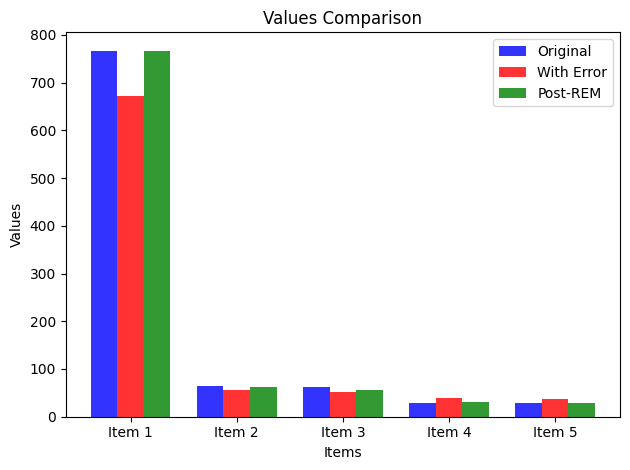

In [177]:
def get_first_n_values(dictionary, n=5):
    return list(dictionary.values())[:n]

original_values = get_first_n_values(originalDict, 5)
added_error_values = get_first_n_values(addedErrorDict, 5)
sorted_values = get_first_n_values(sorted_dict, 5)

labels = [f'Item {i+1}' for i in range(5)]

n_groups = 5
fig, ax = plt.subplots()
index = range(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, original_values, bar_width,
                 alpha=opacity, color='b', label='Original')
rects2 = plt.bar([p + bar_width for p in index], added_error_values, bar_width,
                 alpha=opacity, color='r', label='With Error')
rects3 = plt.bar([p + bar_width * 2 for p in index], sorted_values, bar_width,
                 alpha=opacity, color='g', label='Post-REM')

plt.xlabel('Items')
plt.ylabel('Values')
plt.title('Values Comparison')
plt.xticks([p + bar_width for p in index], labels)
plt.legend()

plt.tight_layout()
plt.show()

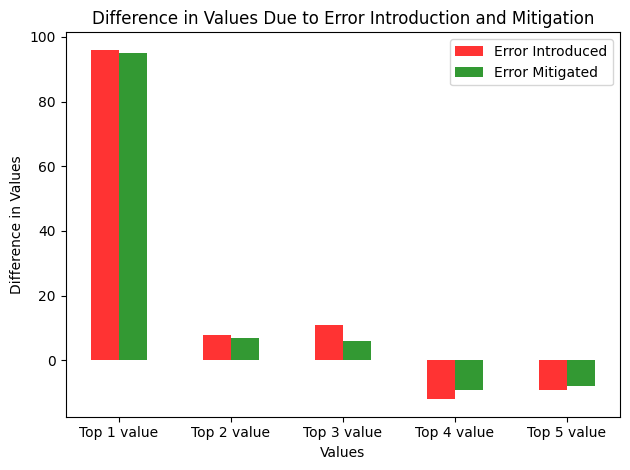

In [184]:
def get_first_n_values(dictionary, n=5):
    return list(dictionary.values())[:n]

original_values = get_first_n_values(originalDict, 5)
added_error_values = get_first_n_values(addedErrorDict, 5)
sorted_values = get_first_n_values(sorted_dict, 5)

difference_original_error = [o - a for a, o in zip(added_error_values, original_values)]
difference_error_sorted = [s - a for s, a in zip(sorted_values, added_error_values)]

labels = [f'Top {i+1} value' for i in range(5)]

n_groups = 5
fig, ax = plt.subplots()
index = range(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, difference_original_error, bar_width,
                 alpha=opacity, color='r', label='Error Introduced')

rects2 = plt.bar([p + bar_width for p in index], difference_error_sorted, bar_width,
                 alpha=opacity, color='g', label='Error Mitigated')

plt.xlabel('Values')
plt.ylabel('Difference in Values')
plt.title('Difference in Values Due to Error Introduction and Mitigation')
plt.xticks([p + bar_width/2 for p in index], labels)
plt.legend()

plt.tight_layout()
plt.show()